**EDA on Haberman Dataset**

This is assignment on EDA on haberman survival dataset. This dataset is available on Kaggle. 

**Data Description :**

 This dataset contains cases from a study that was conducted between 1958 and 1970 at university of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

**Number of Instances :**  306

**Number of Attributes :** 4

**Attribute information:**
 - Age : Age of Patient at time of Operation (numerical)
 - Op_Year : Patients Year of Operation. 2 digits Year - 1900 (numerical)
 - Axil_Nodes : Number of positive axillary nodes detected (numerical)
 - Surv_Status : Survival Status (class attribute)
    
    1 = the patient survived 5 years or longer

    2 = the patient died within 5 years

**Dataset** 

https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1?select=haberman.csv






 

**Import Dataset:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [2]:
column_names = ['Age','Op_Year','Axil_Nodes','Surv_Status']
haberman = pd.read_csv('haberman.csv', header= None, names = column_names)

**Basic checks of data**

In [3]:
# check the shape. This dataset should have 306 rows and 4 columns
haberman.shape

(306, 4)

In [4]:
# List of features/ columns
haberman.columns

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')

In [5]:
# check first few rows and last few rows
print(haberman.head())
print(haberman.tail())

   Age  Op_Year  Axil_Nodes  Surv_Status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1
     Age  Op_Year  Axil_Nodes  Surv_Status
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2


In [6]:
# class variable is number instead of category. We will convert it
# credit : https://www.geeksforgeeks.org/python-pandas-dataframe-astype/ for converting type of feature to category
haberman['Surv_Status'] = haberman['Surv_Status'].map({1:'Yes',2:'No'})
haberman['Surv_Status'] = haberman['Surv_Status'].astype('category')
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          306 non-null    int64   
 1   Op_Year      306 non-null    int64   
 2   Axil_Nodes   306 non-null    int64   
 3   Surv_Status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [7]:
# lets check data 
print(haberman.head())
print(haberman.tail())


   Age  Op_Year  Axil_Nodes Surv_Status
0   30       64           1         Yes
1   30       62           3         Yes
2   30       65           0         Yes
3   31       59           2         Yes
4   31       65           4         Yes
     Age  Op_Year  Axil_Nodes Surv_Status
301   75       62           1         Yes
302   76       67           0         Yes
303   77       65           3         Yes
304   78       65           1          No
305   83       58           2          No


In [8]:
# Kaggle tells us there are no missing values. We will double confirm that
haberman.isnull().sum()

Age            0
Op_Year        0
Axil_Nodes     0
Surv_Status    0
dtype: int64

In [9]:
# check whether class attribute is balanced or not
haberman['Surv_Status'].value_counts()

Yes    225
No      81
Name: Surv_Status, dtype: int64

In [10]:
haberman['Surv_Status'].value_counts(1)

Yes    0.735294
No     0.264706
Name: Surv_Status, dtype: float64

In [11]:
# Summary of data
haberman.describe()

,Age,Op_Year,Axil_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observation :**

1. As per the above result , this is unbalanced dataset. Persons who survived is 225 and not survived is 81.
2.Approximatley 73% of patients have survived after 5 years and 27% of patients have not survived after 5 years.

**Objective:**

 Our objective is to explore this data to identify a relationship between class attribute/dependent variable Survival Status and independent variables Age, Operation Year and Auxilary Nodes.

We will start with univariate analysis and then proceed with bivariate analysis to check if there is any relationship between independent and dependent variables.







## **Univaritae Analysis**

**Probability Density Function (PDF)**

 

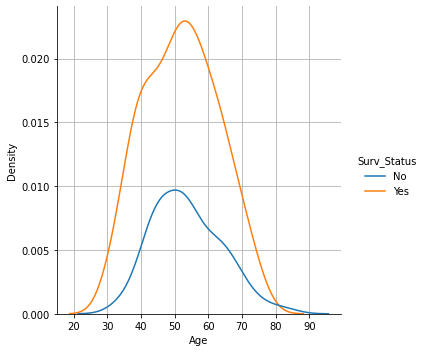

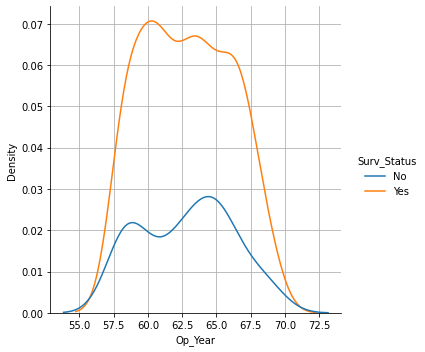

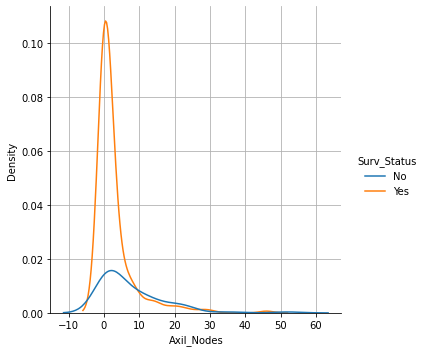

In [12]:
for idx, indep in enumerate (list(haberman.columns)[:-1]):
   sns.displot(data=haberman, x=indep, hue = "Surv_Status", kind = 'kde')
   plt.grid()

**Observations :**

1.  There is clear overlap of PDF between survived and not survived for all the 3 features.
2.  Age group of 40 and 60 has maximum density in both survived and non-survived cases.
3. Maximum number of patients who are not survived has operated on 1958 and 1965.
4. Maximum number of patients who survived has less positive auxilary nodes in the range of 0 to 5. However in the same group we have patients who have not survived also. 
5. No conclusive evidence can be obtained from PDF.

Next step is to check CDF and PDF for all faetures to check if we get any more relationship.

**CDF (Cumulative Distribution Function)**

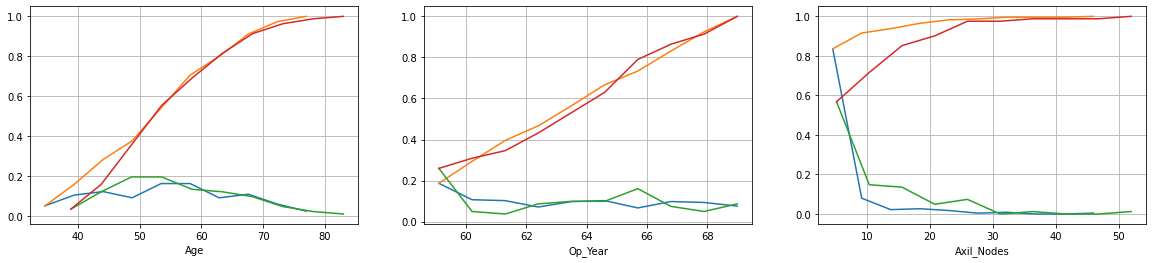

In [13]:
haberman_survived = haberman.loc[haberman['Surv_Status'] =="Yes"]
haberman_notsurvived = haberman.loc[haberman['Surv_Status'] =="No"]

plt.figure(figsize= [20, 4])

for idx, indep in enumerate (list(haberman.columns)[:-1]):
    plt.subplot(1,3, idx + 1)
    counts, bin_edges = np.histogram(haberman_survived[indep], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(indep)
    plt.grid()

   
    counts, bin_edges = np.histogram(haberman_notsurvived[indep], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(indep)
    


**Observations :**

1. There is not much of difference in percentage of survivors and non-survivors after patient age of 50.
2. There is not much of difference in percentage of survivors and non-survivors based on the Year of Operation.
3. Approximatley 80% of people survived when Auxilary nodes is between 0 to 5 . At the same time 60% of people not survived when Auxilary nodes is less.

**Box Plots**

Box plots displays summary of data visually. Data the box plot displays are 25th Percentile, 50th percentile or Median, 75th Percentile and whiskers which displays Q1 -1.5 * IQR and Q3 + 1.5 * IQR. IQR = Q3 - Q1

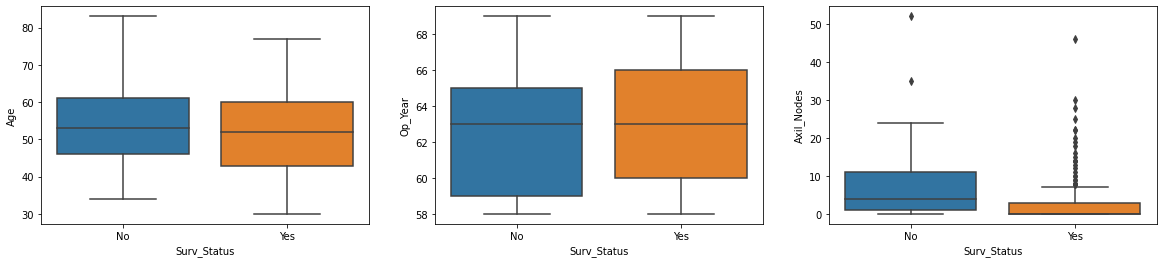

In [14]:
fig, axes = plt.subplots(1,3,figsize=(20,4))



for idx, indep in enumerate (list(haberman.columns)[:-1]):   
   sns.boxplot(data=haberman, x="Surv_Status", y = indep, ax = axes[idx])


**Observations :**

 1. We can see lot of outliers on the Auxilary nodes box plot.
 2. Majority of Patients who survived has Auxilary nodes between 0 to 5. 

**Violin Plots**

  Violin Plots clubs Box Plot and PDF in to a single plot.

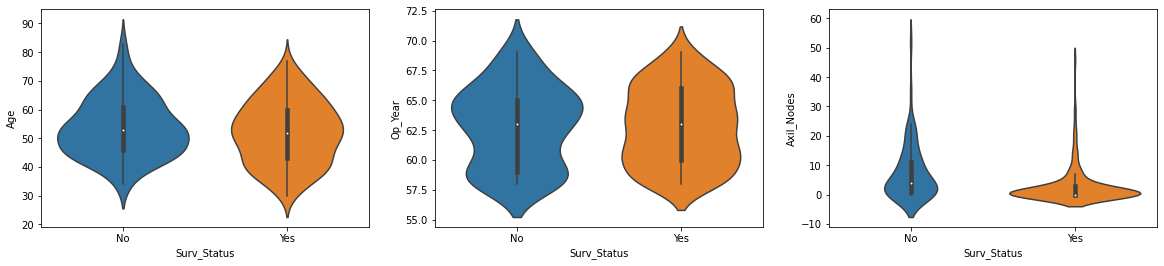

In [15]:
fig, axes = plt.subplots(1,3,figsize=(20,4))
for idx, indep in enumerate (list(haberman.columns)[:-1]):   
   sns.violinplot(data=haberman, x="Surv_Status", y = indep, ax = axes[idx])

**Observations :**

 1. Survival rate is more when the auxilary nodes are between 0 to 5. At the same time, but there are non-survivors also when auxilary nodes are between 0 to 5.
 2. When there is no auxilary nodes patients survived is more than non-survivors. Survival rate reduces as auxilary nodes goes up. 

## **Multi-Variate Analysis**

**2D Scatter Plots**

Scatter plots helps us to identify relationship between two variables. We can examine if there are any relationship between Age and Auxilary Nodes

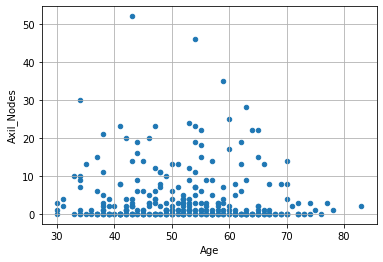

In [16]:
haberman.plot(kind='scatter',x='Age', y='Axil_Nodes')
plt.grid()
plt.show()

Observations :

 Most of the patients have auxilary nodes in the range of 0-10. 
 Very few patients have auxilary nodes of more than 15.

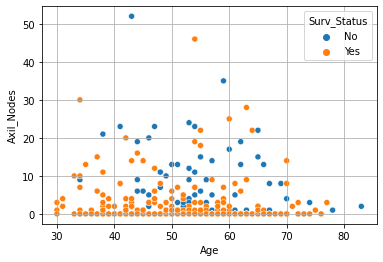

In [17]:
sns.scatterplot(data=haberman, x="Age", y="Axil_Nodes", hue="Surv_Status")
plt.grid()

**Observations :**

 1. Survival rate increases when auxilary node is more than 10.
 2. Most patients survived when there is absence of auxilary nodes.
 3. Patients with Age more than 50 and Auxilary nodes more than 10 have less chance of survival in next 5 years

**Pair Plots**

We can use pair plots to plot the relationship between various features at a same time.

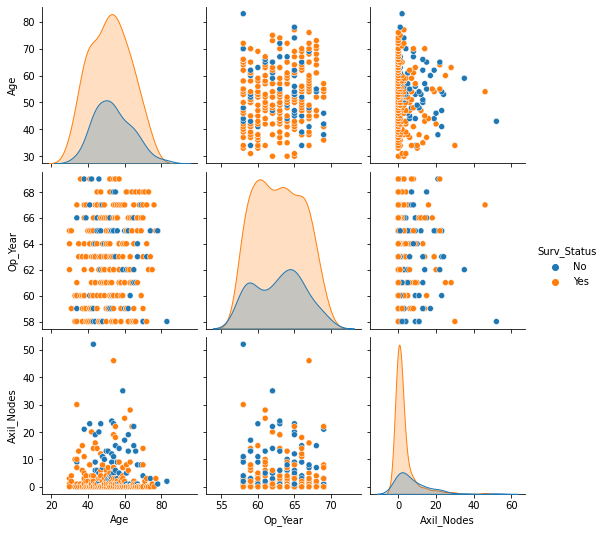

In [18]:
sns.pairplot(haberman, hue="Surv_Status")
plt.grid()

**Observations :**

 1. There is no clear separation of classes in any of the combinations
 2. Axil_Nodes and Age combination is better than other features combination




**Summary :**

1. The average Age of patients who are operated is 52.5 years
2. The Maximum Age of patient who operated is 83 years
3. The Average number of Auxilary nodes is 4 and 75% of patients operated has 4 or less nodes
4. Very few patients has 15 or more auxilary nodes
5. There is no diffrence in survival rate after 50 years of age
6. Survival Rate is generally more when there are less auxilary nodes.
7. Less Auxilary nodes doesnt mean good chances of survival. There are few patients not survived even they have less auxilary nodes
8. Patients who are more than 50 years of age and 10 auxilary nodes, their chances of survival is less.
9. There is no clear separation of classes in any of the combination of variables.

**Conclusion:**

  As dataset is imbalanced with 73% of patients are survived and 27% of patients are not survived and no clear seggregation of classes can be made due to high overlap in univariate and bivariate analysis , we cannot conclude with these features to classify if patient will be survived or not.